[In Data Analysis what all things we do](#Section1)<br>
[EDA code](#Section2)<br>
[Plotting](#Section3)<br>
[Feature Engineering Codes can be given as:](#Section4)<br>
[Pandas Profiling](#Section5)<br>
[All Continuous variables are Scaled](#Section6)<br>
[All categorical Variables are Encoded](#Section7)<br>
[Data Cleaning](#Section8)<br>
[Splitting X and y into training & test datasets](#Section9)<br>
[Linear Regression](#Section10)<br>
[Model evaluation on y-actual and y-pred  for Regression Problems](#Section11)<br>
[Logistic Regression](#Section12)<br>
[Model evaluation on y-actual and y-pred  for Classification Problems](#Section13)<br>
[Random Forest Classifier](#Section14)<br>
[Random Forest Regressor](#Section15)<br>
[Feature Importance in Random Forest](#Section16)<br>
[Decision Tree Classifier](#Section17)<br>
[Decision Tree Regressor](#Section18)<br>
[PCA](#Section19)<br>
[Grid Search CV](#Section20)<br>
[Randomized Search CV](#Section21)<br>
[Naive Bayes](#Section22)<br>
[Performing SMOTE Operation](#Section23)<br>
[KNN](#Section24)<br>
[Cross Validate](#Section25)<br>
[K-Means](#Section26)<br>
[Elbow Method](#Section27)<br>
[Silhoutte Analysis](#Section28)<br>
[Model Development & Evaluation with many Classification Algo togther](#Section29)<br>
[StackingClassifier ](#Section30)<br>
[KNN Imputer](#Section31)<br>
[SQL connection](#Section32)<br>


<a name = Section2></a>

<a name = Section1></a>
### In Data Analysis what all things we do
##### prof of concept (poc) project
1. Missing values
2. Explore about Numerical variable
3. Explore about Categorical variable
4. Finding relationships between feature

<a name = Section2></a>
### EDA code

In [ ]:
import pandas as pd                        # libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
%matplotlib notebook

------------------------------------------------
df = pd.read_csv("C:/Users/0128906/win/DataSets/zomato.csv", encoding= 'latin-1') # if encoding gave error
df_country = pd.read_excel("C:/Users/0128906/win/DataSets/Country-Code.xlsx")
--------------------------------------------

# to save any db fetech file to csv / excel / 
df_dept_data.to_csv('dept_data.csv')
df_emp_data.to_csv('emp_det_data.csv')

df_dept_data.to_excel('dept_data.xlsx')

--------------------------------------------
# how to select only last colmn

df.iloc[:, [3,4]]

--------------------------------------------
#Dividing data into X & y
X = data.drop('Survived', axis=1)
y = data['Survived']

X = dataset.iloc[ : , :-1]
y = dataset.iloc[ : , -1]
--------------------------------------------
# chk missing value
titanic_data.isna().sum().sort_values(ascending= False)  # __or__

df.isnull().sum().sort_values(ascending = False)    # __or__

events_data.shape[0]-events_data.count()  # chk missing value   __or__

[feature for feature in df.columns if df[feature].isnull().sum()>0]
---------------------------------------------------------------------------------

department_data.head()  # gives col name with 1st 5 rows

department_data.shape   # gives shape of dataset

department_data.info()    # gives info of dataset

employee_data['employee_id'].value_counts()  # chk value counts

employee_data['department'].unique()     # chk unique data in particular col

df['avg_monthly_hrs'].value_counts().count()   # get the unique total count of any column --or--
df['avg_monthly_hrs'].unique().size

employee_data.duplicated().any()  # chk for duplicate presence? T\F

empl_data[empl_data.duplicated()].count()  # to chk duplicate count

employee_data.describe()  # describes data for continuous variable

empl_with_perm = pd.DataFrame(empl_data[empl_data['department'] != 'D00-TP'])  # created a new dataframe without 'D00-TP'

missing_state = events_data[events_data['state'].isnull()].city.unique()  # finding cities for missing states

empl_data.replace(to_replace={'-IT':'D00-IT', '小米': 'Xiaomi'}, inplace= True)  # to replace data

final_df[final_df['City'] == 'Mumbai']['City'].count()  # to find count of a particular city

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','') # str replace

# convert obj data type into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

#append


------------------------------------------------------
#Group By
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)  

md = df.groupby(['avg_monthly_hrs','employee_id'])
md.first()

final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
# size() gives the count of all 3 columns 
# reset_index() is used to convert grpby dataframe to dataframe
# rename((columns={ : }) is used rename col
data = data.set_index(['date'])  # also lk this
-------------------------------------------------------------------------------------------------

## Find the country names that has given 0 rating
pd.DataFrame(final_df[final_df['Aggregate rating'] == 0]['Country'].value_counts())
-------------------------------------------------------------------------------------------------

## Find a col wic has null vales & to verify it with other col too
df_emp_data[df_emp_data['satisfaction'].isna()]['department'].value_counts()
-------------------------------------------------------------------------------------------------

#for Categorical Variables we fill missing data with mode
df['salary'] = df['salary'].fillna(df['salary'].mode()[0])

-------------------------------------------------------------------
#drop
titanic_data.drop(['PassengerId','Cabin'], axis = 1,inplace = True)  # Dropping useless Col or below
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis=1)  # Dropping useless Col

df.drop(['User_ID'],axis=1, inplace= True)   # ID's are always unique so we dropped it

-------------------------------------------------------------------
df['recently_promoted'] = df['recently_promoted'].fillna(0)  # filling with 0
-------------------------------------------------------------------
#for Continuous Variables we fill missing data with mean/median
chk with below methods:

**To see distribution of plot between mean & median**
# with distplot
sns.distplot(data.sales, color = 'b')       # we take target variables
plt.axvline(data.sales.mean(), color='r')
plt.axvline(data.sales.median(), color='g')
plt.show()

# with boxplot
plt.plot(figsize=(15,10))
sns.boxplot(df['tenure'])

empl_with_perm['last_evaluation'] = empl_with_perm['last_evaluation'].fillna(empl_with_perm['last_evaluation'].mean())
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

-------------------------------------------------------------------
# Plot data
data.plot(title='Abc', subplots=True)   #dataframe.plot()
plt.show()
-------------------------------------------------------------------
# One hot encoding or Dummification
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True) 
#why drop first, because whenever there are 3 categories, dropping 1 and 2 categories are sufficient to represent 3 categories
#or
df['Gender'] = df['Gender'].map({'F': 0,'M':1})

# Handling Categorical Feature Age
# Will give Target Ordinal encoding

df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}) # in dict form

# or  #Label Encoding is applied to Ordinal Category
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
df['Age'].unique()

-------------------------------------------------------------------
#merge Datasets
df1 = pd.merge(empl_with_perm,emp_details_data, on = 'employee_id', how = 'inner')
df = pd.merge(dept_data,df1, left_on= 'dept_id', right_on='department', how = 'inner') # if 2 diff col names

-------------------------------------------------------------------
#to Identify Categorical Col from a dataframe
col = df.columns
num_col = df._get_numeric_data().columns
list(set(col) - set(num_col))

<a name = Section32></a>
### SQL connection

In [ ]:
# querying 3 tables togther

import mysql.connector

from mysql.connector import errorcode

try:
    mydb = mysql.connector.connect(host="cpanel.insaid.co",user="student",password="student",database = "Capstone2")

    mycursor = mydb.cursor()
    mycursor.execute('select database()')
    mycursor.fetchall()     # this line either save it in a selected_db variable jus to print below stmt
    # like selected_db = mycursor.fetchall()
    # print('Connected to: ', selected_db, '\n\n')


    query = "SELECT * FROM department_data"
    df_dept_data = pd.read_sql_query(query, mydb)
    print('Department Data: ')
    print(df_dept_data.head(3),'\n')
    
    query = "SELECT * FROM employee_details_data"
    df_emp_detail_Data = pd.read_sql_query(query, mydb)
    print('Employee Personal info: ')
    print(df_emp_detail_Data.head(3),'\n')
    
    query = "SELECT * FROM employee_data"
    df_emp_data = pd.read_sql_query(query, mydb)
    print('Employee Data: ')
    print(df_emp_data.head(3),'\n')

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    mydb.close() 

In [ ]:
# 2nd way 
try:
    mySQLconnection = mysql.connector.connect(host='cpanel.insaid.co',
                             database='Capstone2',
                             user='student',
                             password='student')
    
    if mySQLconnection.is_connected():
        db_Info = mySQLconnection.get_server_info()
        print("Connected to db... MySQL Server version on ",db_Info)
        cursor = mySQLconnection.cursor()
        cursor.execute("select database();")
        database = cursor.fetchone()
        print ("Connected to - ", database)
        
        sql_select_Query = "select * from department_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_dept_data = pd.DataFrame(SQL_Query)
        print(df_dept_data.head(3))
        
        sql_select_Query = "select * from employee_details_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_emp_data = pd.DataFrame(SQL_Query)
        print(df_emp_data.head(3))

        sql_select_Query = "select * from employee_data"
        SQL_Query = pd.read_sql_query(sql_select_Query, mySQLconnection)
        df_emp_detail_Data = pd.DataFrame(SQL_Query)
        print(df_emp_detail_Data.head(3))
except Error as e :
    print ("Error while connecting to MySQL", e)
finally:
    #closing database connection.
    if(mySQLconnection .is_connected()):
        mySQLconnection.close()
        print("MySQL connection is closed")

<a name = Section3></a>
### Plotting

In [ ]:
# Bar chart
df['marital_status'].value_counts().plot.bar()
-------------------------------------------------------
df2.phone_brand.value_counts().head(10).plot(kind='bar')
-------------------------------------------------------------------
df2[df2.gender=='M'].groupby(['group','phone_brand'])['phone_brand'].count().sort_values(ascending = False).head(10).plot(kind='bar')

-------------------------------------------------------------------
# Pie chart 
df['salary'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('salary')
plt.title('Pie chart showing the proportion of Salary in Attrition')
-----------------------------------------------------------------------
space = np.ones(2)/10
data['Class'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Not Fraud', 'Fraud'])
plt.ylabel(ylabel = 'Class', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()
-----------------------------------------------------------------------------------
import numpy as np
space = np.ones(11)/10
df2['phone_brand'].value_counts().head(10).plot(kind='pie',  fontsize=11, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=190, figsize=(16,11), cmap='inferno', legend=True)

plt.ylabel('Genre')
plt.title('Donut Plot showing the proportion of each genre value')
plt.savefig('Donut plot total genre.png')
-----------------------------------------------------------------------------------
# Bar Chart
plt.figure(figsize=(10,7))
df.groupby(['dept_name'])['employee_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')
plt.title('Attrition by Department')
-----------------------------------------------------------------------
# Boxplot
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='dept_name', y='tenure', palette='viridis', width=0.8)
plt.xticks(rotation=90)
plt.title('Department Vs Tenure ')
--------------------------------------------------------------------------
# Pair Plot
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')
-------------------------------------------------------------------------------
# Heat map
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
plt.savefig('correlation.png')
plt.show()
-------------------------------------------------------------------------------
#pie chart - Top 5 countries using Zomato
plt.figure(figsize=(16,16))
plt.pie(country_values[:5], labels= country_names[:5], autopct= '%1.2f%%')
plt.show()
-------------------------------------------------------------------------------
# Bar plot
plt.figure(figsize= (12,6))
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings,hue='Rating color', palette=['white','red','orange','yellow','green','darkgreen'])
plt.show()

# to match colors will use palette
#hue to show as per color 
-------------------------------------------------------------------------------
# Bar plot
# visulaization of Age vs Purchase
sns.barplot('Age','Purchase', hue = 'Gender', data=df) 
-------------------------------------------------------------------------------
# how to gv 2 plots togther
ig = plt.figure(figsize = [15, 8])
plt.subplot(1, 2, 1)
sns.countplot(x = 'Class', data = data, palette = ['#56DB7F', '#DB5E56'])
plt.xlabel(xlabel = 'Class', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)

plt.subplot(1, 2, 2)
space = np.ones(2)/10
data['Class'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 8], legend = True, colors = ['#56DB7F', '#DB5E56'])
plt.legend(['Not Fraud', 'Fraud'])
plt.ylabel(ylabel = 'Class', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Fraudulent Transactions', y = 1.02, size = 16)
plt.show()
-------------------------------------------------------------------------------



In [ ]:
import plotly.graph_objs as go             # For interactive graphs-- from Class 6 Feb 22, K-Means

# Extract labels and values of menu category
labels = data['Age'].value_counts().index
values = data['Age'].value_counts().values

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=labels, y=values))

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='Frequency Distribution of Age', 
                  title_x=0.5, 
                  yaxis_title='Frequency', 
                  xaxis_title='Age')

# Display the figure
fig.show()
-------------------------------------------------------------------------------
%matplotlib notebook
sns.countplot(y='Type', data=glass, palette='hls')
plt.show()
-------------------------------------------------------------------------------



<a name = Section4></a>
#### Feature Engineering Codes can be given as:

In [ ]:
titanic_data['Genderclass']  =   titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1)


titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1


events_data['latitude'] = events_data.groupby('city')['latitude'].apply(lambda x : x.fillna(x.mean()))

------------------------------------------------------------------------------------------------------
events_data['Time_stamp'] = pd.to_datetime(events_data['timestamp'])

- events_data['Date'] = pd.to_datetime(events_data['Time_stamp']).dt.date
- events_data['Hour'] = pd.to_datetime(events_data['Time_stamp']).dt.hour
- events_data['Minute'] = pd.to_datetime(events_data['Time_stamp']).dt.minute


final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]   #OR

final_df['Date'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
final_df['Month'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
final_df['Year'] = final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

final_df['Dep_Hr']= final_df['Dep_Time'].apply(lambda x:x.split(':')[0])
final_df['Dep_Min']= final_df['Dep_Time'].apply(lambda x:x.split(':')[1])
final_df['Dep_Hr'] = final_df['Dep_Hr'].astype(int)
final_df['Dep_Min'] = final_df['Dep_Min'].astype(int)
final_df.drop('Dep_Time', axis=1, inplace=True)
-------------------------------------------------------------------------------------
events_data['device_id'] = events_data.groupby(['city', 'Date'])['device_id'].apply(lambda x : x.ffill().bfill())
-------------------------------------------------------------------------------------

phone_brand_device.replace(to_replace={'小米': 'Xiaomi', '三星': 'Samsung', '乐视':'LeEco'},inplace=True)
-------------------------------------------------------------------------------------

# Creating a new feature Time in hours
data['Time(in Hours)'] = data['Time'] / 3600  # data['Time'] :- Seconds elapsed between each transaction 

# eg: 45 seconds is 45 seconds / 3600 seconds) = 45/3600 hours = 0.0125 hours.
-------------------------------------------------------------------------------------

In [ ]:
# from Class 5th Mar 22, Ensemble Learning - Part I

from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model

selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)


X.columns[(selector.get_support())]


# just nrml code
# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

In [ ]:
# from Class 5th Mar 22, Ensemble Learning - Part I
# to use FeatureImportances need to have yellowbrick

# !pip install -q yellowbrick  
from yellowbrick.model_selection import FeatureImportances    # To retrieve Feature Importances over model

# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

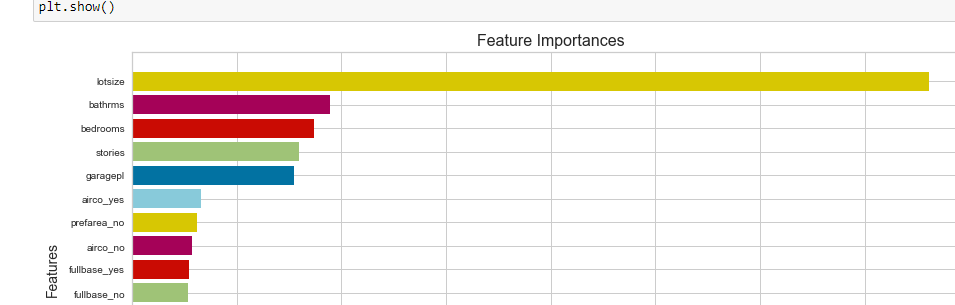

<a name = Section5></a>
### Pandas Profiling

In [ ]:
# !pip install pandas_profiling

import pandas_profiling
import seaborn as sns

df = sns.load_dataset('tips')
df.head()

from pandas_profiling import ProfileReport
profile = ProfileReport(df, explorative=True, dark_mode= True)
profile.to_file('output.html')


**describe()** gives output only for Continuous Variables

> If the mean & median of a missing data column are very near to each other, then u can fill the missing value by mean.

> If the mean & median of a missing data column are away from each other, then u can fill the missing value by median.
As this column is likely to have Outliers.

<a name = Section6></a>
### All Continuous variables are Scaled

from data.corr, we concluded that TV is 1st, radio is 2nd, newsp is 3rd. But in above image its says newsp is 2nd. we dont want this thing to happen, I dnt want ML algo to give important to TV or radio or newpr, so we are creating a model, we are studying X and y and **All of them are equally imp** so to avoid this we have to **scale the data**

#### Scalling : propertionately REDUCING everything to make it small.
1. Standard scaler = centers around 0, scale down as small as near 0 to possible, -ve or +ve
2. Minmax = b/w[0 and 1]
3. Robust scaler = (outliers)

In [ ]:
from sklearn.preprocessing import StandardScaler    # import standard scaler

scaler = StandardScaler()                # create a object of scaler
                     # we ask this obj to do - Study on X_train & Give exam on X_train (ID V's)
    
X_train [['TV','radio','newspaper']] = scaler.fit_transform(X_train) # we used fit & transform togther on X-Train

X_test [['TV','radio','newspaper']] = scaler.transform(X_test)  # last step

#OR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

#OR

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

numeric_features = X_train[['Age','Fare']].columns  #as they are numerical in nature we scale them.

X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])  # study and exam

X_test[numeric_features] = sc.transform(X_test[numeric_features])   #give exam on X_test

<a name = Section7></a>
### All categorical Variables are Encoded

#### One-hot encoding \ Dummification (mostly used)

- in ML Model, data is never given in string format bcoz Machines can never understanding string data, they only understand Numeric


- titanic = pd.get_dummies(titanic, columns=['Genderclass','Embarked'], drop_first=True) # using only the col wer reqd

or

- titanic = pd.get_dummies(titanic, drop_first=True) # can be applied to complete dataframe

<a name = Section8></a>
### Data Cleaning

- In this section, we will **remove** columns which are **redundant** for model.

- We will first remove the **ID** column then remove the columns with **standard deviation = 0** from the dataset.

- Standard Deviation = 0 means that **every data point in a column is equal to its mean**.

- Also means that all of a column's values are **identical** and such columns do **not help** us in **prediction** so we will drop them.

- Removing columns with **standard deviation = 0** will also help to solve multicolinearity

In [ ]:
value = value.drop('ID', axis = 1)

drop_cols=[]

for cols in value.columns:
    if value[cols].std() == 0:
        drop_cols.append(cols)

print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
value.drop(drop_cols, axis=1, inplace=True)

value.head()

<a name = Section9></a>
### Splitting X and y into training & test datasets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0) 

# if random state is not set, the shuffle is going to be different.
#random_state is same as seed.

#default test_size = 0.25
#random_state = seedvalue

<a name = Section10></a>
### Linear Regression

In [ ]:
#import the module
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()            # create a obj of LinearRegression()

                                          # Study on (QB & AB) i.e. fit()
regressor.fit(X_train, y_train)           # fit mean study so go & study on (QB & AB) & 
                                          # regressor has done the study & have all the intelligence
    
y_pred_train = regressor.predict(X_train)  # Using the Model for Prediction, 
                                           # we are giving model X-train,test and expecting to predict on y-train,test
y_pred_test = regressor.predict(X_test)    

# formula - line of best fit
# y = m1x1 + m2x2 + m3x3 + c 
regressor.intercept_   # gives value of y intercept i.e. its = c
regressor.coef_   # beta1, beta2, beta3, is slope/Coefficient i.e. m1, m2, m3

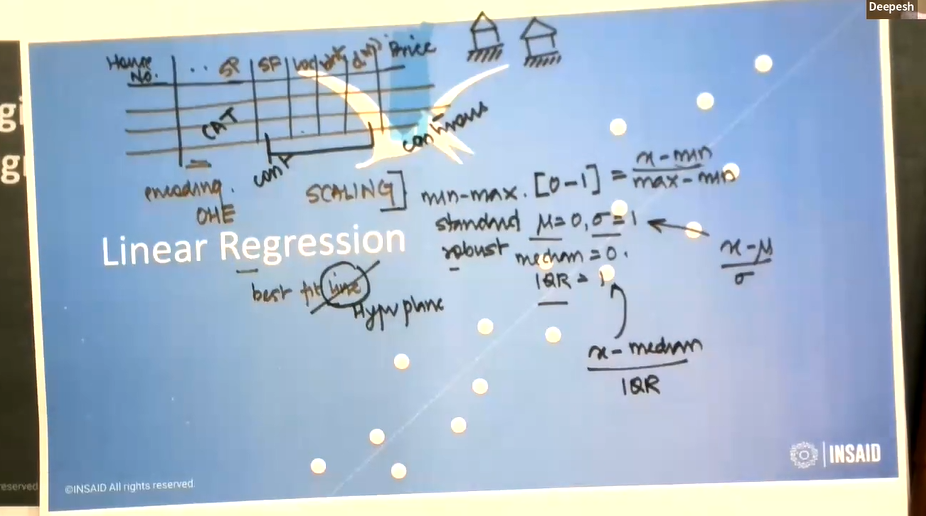

<a name = Section11></a>
#### Model evaluation on y-actual and y-pred  for Regression Problems

In [ ]:
from sklearn import metrics

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))            # Eg. print & verify results

MSE

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))  # RMSE the best to go
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))

MAPE_train = (metrics.mean_absolute_percentage_error(y_train, y_pred_train))
MAPE_test = (metrics.mean_absolute_percentage_error(y_test,y_pred_test))
print('MAPE for training set is {}'.format(MAPE_train))

r2_score_train = metrics.r2_score(y_train, y_pred_train)
r2_score_test = metrics.r2_score(y_test, y_pred_test)
print('R2_Score for training set is {}'.format(r2_score_train))

# no importing for Adj R2 as it is by defination.
#Adj R2 is calulated after R2 score. formula - [ 1 - [(1-R^2)(n-1)/n-p-1)] ]

X_train.shape   # Eg:  n = 160 (rows), p = 3 (col)
# or
n = X_test.shape[0]
p = X_test.shape[1]
num = (1-r2_score_train) * (n-1)
den = n-p-1

Adj_r2_score_train = 1- (num/den)

#### Formulas : 

1. Adj R2 is calulated after R2 score. formula - [ 1 - [(1-R^2)(n-1)/n-p-1)] ]
2. Specificity = TN/(TN+FP) = TN/N
3. Sensitivity = TP/(TP+FN) = TP/P 

<a name = Section12></a>
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)  

y_pred_train = logreg.predict(X_train) # give exam on what u hv studied

y_pred_test = logreg.predict(X_test)  # give exam on what u hv not seen
# predict gives o/p only in [0,1,1,1,0,0,1].....


# to see actual values we use below
logreg.predict_proba(X_test)   # in o/p it will show 2 col - [0 and 1] 

# by default the thresold is 0.5 but we can change also, but not imp
logreg.predict_proba(X_test)[:, 1] > 0.75

pred1 = np.where(logreg.predict_proba(X_test)[:, 1] > 0.75,1,0)



<a name = Section13></a>
### Model evaluation on y-actual and y-pred  for Classification Problems

#### Below are different Model Evaluation.
- 1. Confusion Matrix
- 2. Accuracy
- 3. Classification Error
- 4. Sensitivity / Specificity
- 5. Precision / Recall - we choose wic is more dangerous
- 6. F - Measure / Fbeta Measure
- 7. ROC\AUC 
- 8. Classification Report

#### When Target variable is Balanced we go for - Accuracy

#### When Target variable is Imbalanced we go for - F Measure\ F Beta Measure

In [ ]:
# Accuracy = is coming from Confusion Matrix = TN + TP / (TN+FN+FP+TP)

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is: ', accuracy_score(y_test, y_pred_test))

# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)
# or adding some decoration
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

# Classification_report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

# Sensitivity / Specificity

Specificity = TN/(TN+FP) = TN/N
Sensitivity = TP/(TP+FN) = TP/P 


# Precision_score, Recall_score

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))


# F1 Score mostly used, the more the score is close to 1 its considered good
from sklearn.metrics import f1_score
print('F1 score for model1:', f1_score(y_test, predection1))


#ROC\AUC - Visually looking how good the model is.
from sklearn.metrics import roc_curve, auc
probs = model1.predict_proba(X_test)

preds = probs[ : ,1]
preds[:10]     #selecting first 10 predictions from 1st row.
false_positv_rate, true_positv_rate, threshold = roc_curve(y_test,preds)
roc_auc = auc(false_positv_rate,true_positv_rate)
roc_auc

<a name = Section17></a>
### Decision Tree Classifier

In [ ]:
# refer sklearn site for hypertunning

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

#or 

from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X, y)
predicted= model.predict(x_test) # or mentioned below
    
    
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test) 

<a name = Section18></a>
### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state=dom_state = 100)
dtreg.fit(X_train, y_train)

dtreg_pred_y_train = dtreg.predict(X_train)
dtreg_pred_y_test = dtreg.predict(X_test)

print('MAE: ', metrics.mean_absolute_error(y_test,dtreg_pred_y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,dtreg_pred_y_test)))

<a name = Section14></a>
### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

model2 = RandomForestClassifier(random_state=0, 
                                max_depth= 5,
                                min_samples_leaf= 5,
                                min_samples_split=7,
                                min_weight_fraction_leaf= 0.0,
                                n_estimators = 12,
                                n_jobs= -1
                               )

model1.fit(X_train, y_train)  # Study
model2.fit(X_train, y_train)   # Study


#Using the model for prediction

predection1 = pd.DataFrame()
predection1 = model1.predict(X_test)    # Exam    # Unseen Data
predection1

predection2 = pd.DataFrame()
predection2 = model2.predict(X_test) 
predection2

<a name = Section15></a>
### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressoregressor
model1 = RandomForestRegressor(random_state = 0, n_estimators=130, n_jobs=-1)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


# its in for loop with linear Regression

clfs = [LinearRegression(), RandomForestRegressor(random_state=42)]

for clf in clfs:                   # 1st it will take LinearReg, 2nd time RanforRegr

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(X_train, y_train)

  # Make predictions on the trained model
  predictions = clf.predict(X_test)

  # Estimating the model performance
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
  R_squared = metrics.r2_score(y_test, predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[RMSE]:', RMSE, '[R-Squared]:', R_squared, '[Processing Time]:', elapsed_time, 'seconds')
  print('----------------------------------------\n')

<a name = Section16></a>
### Feature Importance in Random Forest

In [ ]:
features = X_train.columns
importances = clf.feature_importances_
importances

indices = np.argsort(importances)
indices

features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=[15, 7])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=12)
plt.grid(b=True)
plt.show()

<a name = Section19></a>
### PCA
- Data must be scaled before we go for PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train[col] = pca.fit_transform(X_train[col])
X_test[col] = pca.transform(X_test[col])
---------------------------------------------------------
#or
# Perform PCA on X (standardized features)
pca = PCA(n_components=0.80, random_state=0).fit(X_train)  #n_components=0.80 it means to capture first 80% of the variance
---------------------------------------------------------
#or
pca = PCA(k=3)
---------------------------------------------------------
#to check variance ratio selected by PCA
expln_variance = pca.explained_variance_ratio

type(expln_variance) --> is in numpy.ndarray

np.sum(expln_variance)

len(expln_variance)
---------------------------------------------------------
#how to try with less no. of components
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train1 = pca.fit_transform(X_train[col])
X_test1 = pca.transform(X_test[col])

---------------------------------------------------------
#refer ipynb Class - 15th Jan 2022, PCA also for more codes on min components

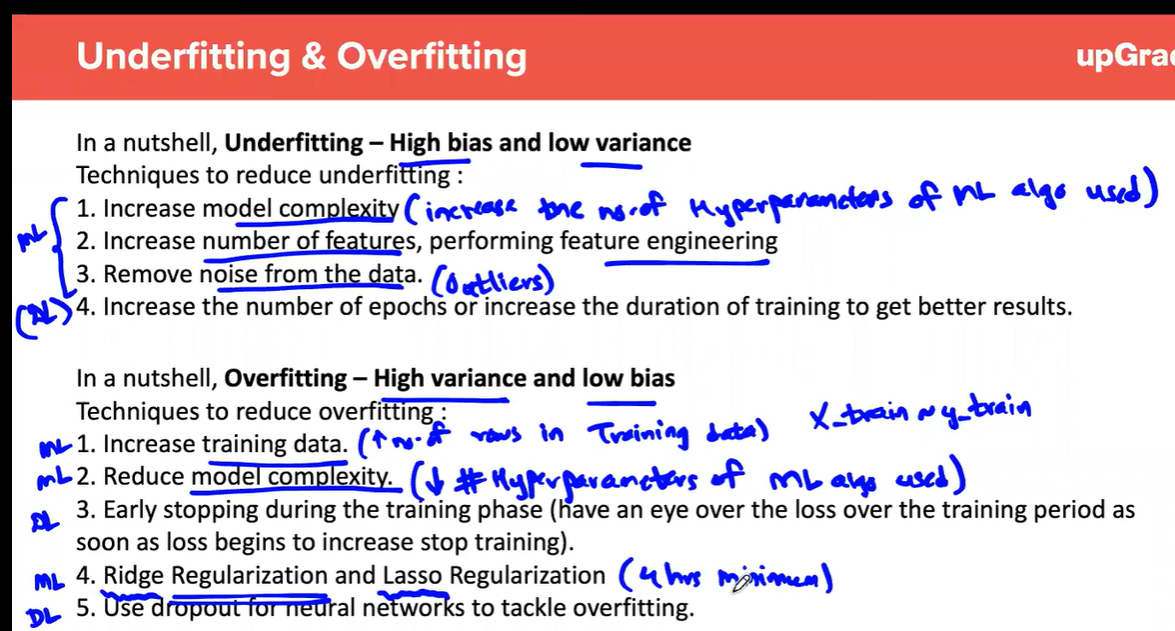

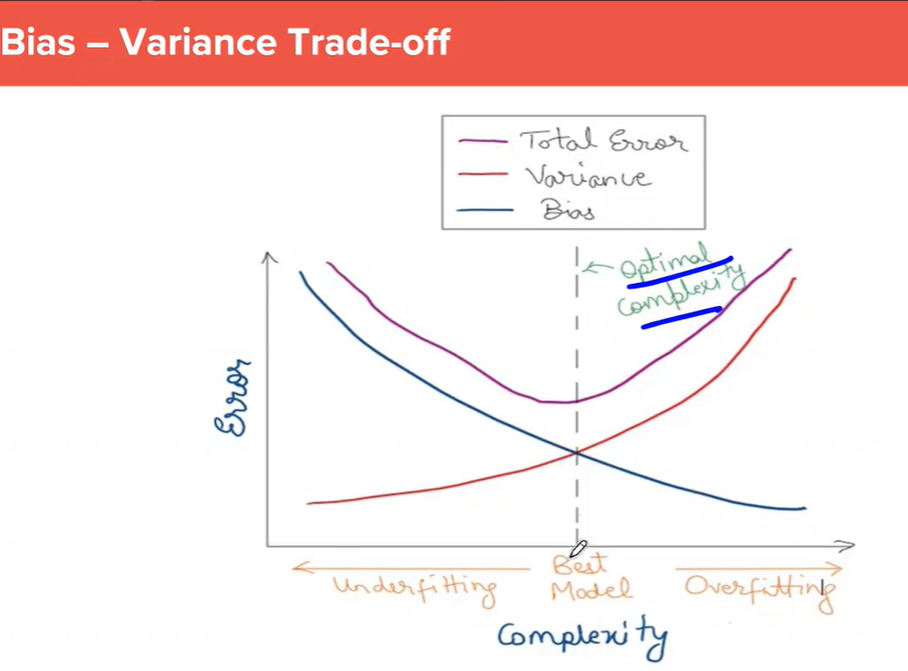

<a name = Section20></a>
This both CV's can be used with any of the ML algo's
### Grid Search CV

In [ ]:
# Grid Search CV is used whenever we have to try a lot of combination.

# 1st to define parameters

param_dist ={                       # can be any name
 "criterion" : ["gini","entropy"],
 "max_depth" : [1,2,3,4,5,6,7,None]
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=param_dist, cv=10, n_jobs=-1)  #crs vlidatn is 10 so 10*14 cmbinatn,cv cn be 5,7,10

##(model is coming from from 
#[sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state = 0)
# model.fit(X_train, y_train) ] #)  which we created for DecisionTree


grid.fit(X_train,y_train)   #aftr tryig all the cmbint

grid.best_estimator_   # we chk all below
grid.best_score_
grid.best_params_

#now predict
y_pred_test11 = grid.predict(X_test)
y_pred_train11 = grid.predict(X_train)

from sklearn.metrics import accuracy_score        #chk accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test11))


<a name = Section21></a>
### Randomized Search CV

In [ ]:
# Parameters for RandomizedSearchCV
# Specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }

# Run randomized search
random_search = RandomizedSearchCV(estimator=clf, 
                                   param_distributions=param_dist,
                                   n_iter=50,              
                                   n_jobs=-1)    #n_iter = 50 means try any 50 combintn

random_search.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = random_search.predict(X_train)
y_test_pred_count = random_search.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=random_search, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=random_search, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

<a name = Section22></a>
### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()       # created a obj
naive.fit(X_train, y_train)

y_train_pred_count = naive.predict(X_train)
y_test_pred_count = naive.predict(X_test)

y_train_pred_proba = naive.predict_proba(X_train)   #to understand probability lk Logist Regression
y_test_pred_proba = naive.predict_proba(X_test)

<a name = Section23></a>
### Performing SMOTE Operation
- used for Class Imbalance Problem
- also some other Smote technnique - ADAYSN, KMeansSMOTE, SVMSMOTE, TOMEK LINKS

In [ ]:
from imblearn.over_sampling import SMOTE  
sm = SMOTE(random_state = 42)
X1, y1 = sm.fit_resample(X, y)  #X,y after resampling

#aftr this we do train_test_split & proceed for modeling

<a name = Section24></a>
### KNN


In [ ]:
# Divide data into X and y
X = irisdata.drop('species', axis =1)
y = irisdata['species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

#Feature Scaling
#Before makg any actual prediction, it is always a good practice to scale the feature 
#so that all of them can be uniformly evaluated

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit_transform(X_train)
sc.transform(X_test)

# Model Training & Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Evaluting the Algo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:
# how to find\calculate proper K
error = []

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('error rate K valye')

In [ ]:
# with hyperparameter tunning

# Creating a parameter grid for Random Forest and KNN
param_grid_rfc = { 'n_estimators': [50, 100, 500, 1000],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['gini', 'entropy']}

param_grid_knn = {'n_neighbors': list(range(2, 20)),
                  'metric': ['minkowski',],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': list(range(1,6)),
                  'weights': ["uniform", "distance"]}

# Putting the parameters in a list
param_grid = [param_grid_rfc, param_grid_knn]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating models
clfs = [RandomForestClassifier(random_state=42, class_weight='balanced'), KNeighborsClassifier(n_jobs=-1)]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying GridSearchCV on the model
  cv = GridSearchCV(estimator=clf, param_grid=param_grid[i], cv= 5)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1

<a name = Section25></a>
### Cross Validate


In [ ]:
#https://www.analyticsvidhya.com/blog/2021/05/4-ways-to-evaluate-your-machine-learning-model-cross-validation-techniques-with-python-code/

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5, random_state=42), 
                          scoring='accuracy', 
                          return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

<a name = Section26></a>
### K-Means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

kmeans.labels_       #its shows labels as per clusters

#how to see the centroid point with cluster points
import matplotlib.pyplot as plt
plt.scatter(X[:0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

# with another set of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:0],X[:,1], c=kmeans.labels_, cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')



kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
plt.scatter(X[:0],X[:,1], c=kmeans.labels_, cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

# like this we can any no. of clusters


<a name = Section27></a>
### Elbow method
Also 
- Hopkins Test
- Silhoutte score
- Hierachl Custering
- Kmeans ++ https://iq.opengenus.org/k-means-vs-k-means-p/#:~:text=Both%20K%2Dmeans%20and%20K,dependent%20on%20initialization%20of%20centroid

In [ ]:
-- from Class - 29 Jan & 30 Jan 22, KNN
#In Elbow method whever we find the smallest point we select that.  

from sklearn.cluster import KMeans

wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)  # also KMeans(n_clusters=i, max_iter=500, random_state=42, n_jobs=-1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<a name = Section28></a>
### Silhoutte Analysis

In [ ]:
#In Silhoutte score whever we find the tallest point we select that.

from sklearn.metrics import silhouette_score

sse =[]
for k in range(2,15):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append([k,silhouette_score(X, kmeans.labels_)])

<a name = Section29></a>

---
### Model Development & Evaluation with many Classification Algo togther
---

- In this section we will develop variety of models such as: 

|Logistic Regression|Decision Tree|Random Forest|Bagging|Adaptive Boosting|Gradient Boosting|Voting Classifier|
|:--|:--|:--|:--|:--|:--|:--|

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.

- __But in a real-life situation, one must train the model individually as then decide which model is best in which situation.__

In [ ]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 42, class_weight='balanced')

sv_clf = SVC(random_state=42, class_weight='balanced', probability=True)

dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')

bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('dt', dt_clf), ('svc', sv_clf)], voting='soft')

ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=500, random_state = 42)

In [ ]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, bag_clf, voting_clf, rf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

In [ ]:
train_scores, test_scores, clf_names

In [ ]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

accuracy_frame

above code gives output as below
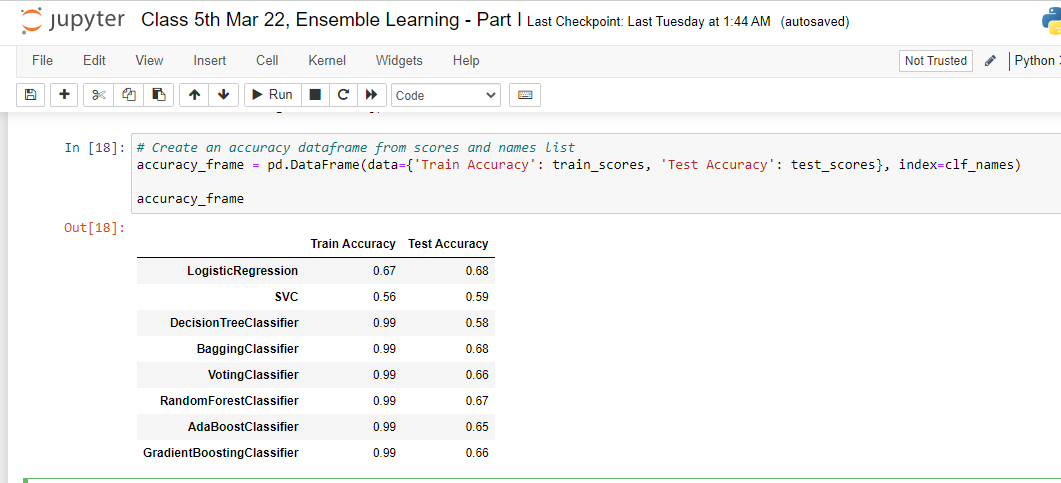

<a name = Section30></a>
###  StackingClassifier 

In [ ]:
#from Class 5th Mar 22, Ensemble Learning - Part II

from sklearn.ensemble import StackingClassifier 

%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)), 
              ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('knn', KNeighborsClassifier(n_jobs=-1)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=GradientBoostingClassifier(random_state=42), 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)

# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

<a name = Section31></a>
### KNN Imputer
kNN Imputation for Missing Values in Machine Learning

In [ ]:
# Class 12th Mar 22, Optimization

%%time
# Imputing missing data for numerical data
# Have some patience, it may take some time :)
# CPU times: user 7min 27s, sys: 16.6 s, total: 7min 43s
# Wall time: 6min 57s
knn_imputer = KNNImputer()
raw_num = knn_imputer.fit_transform(data[['Credit Score', 'Annual Income', 'Months since last delinquent', 
                                          'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']])

# A new dataframe representing non-null values
raw_frame = pd.DataFrame(data=raw_num, columns=['Credit Score', 'Annual Income', 'Months since last delinquent', 
                                                    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'])
# Updating original dataset with updated values
data['Credit Score'] = raw_frame['Credit Score']
data['Annual Income'] = raw_frame['Annual Income']
data['Months since last delinquent'] = raw_frame['Months since last delinquent']
data['Maximum Open Credit'] = raw_frame['Maximum Open Credit']
data['Bankruptcies'] = raw_frame['Bankruptcies']
data['Tax Liens'] = raw_frame['Tax Liens']

# Imputing missing data for categorical data
data['Years in current job'] = data['Years in current job'].replace(np.nan, data['Years in current job'].mode()[0])

# Print success message on data imputation
print('Imputing Missing Data Sucess!!')